In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

print('setup completed')


setup completed


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Indian_Traffic_Violations.csv'
pd.options.display.max_columns = None
df = pd.read_csv(file_path)
df.head()

,Violation_ID,Violation_Type,Fine_Amount,Location,Date,Time,Vehicle_Type,Vehicle_Color,Vehicle_Model_Year,Registration_State,Driver_Age,Driver_Gender,License_Type,Penalty_Points,Weather_Condition,Road_Condition,Officer_ID,Issuing_Agency,License_Validity,Number_of_Passengers,Helmet_Worn,Seatbelt_Worn,Traffic_Light_Status,Speed_Limit,Recorded_Speed,Alcohol_Level,Breathalyzer_Result,Towed,Fine_Paid,Payment_Method,Court_Appearance_Required,Previous_Violations,Comments
0,VLT100000,Overloading,4544,Karnataka,2023-01-01,23:02,Car,Red,2012,West Bengal,25,Male,Commercial,5,Cloudy,Slippery,OFF9971,Local Police,Valid,4,NaN,Yes,Green,100,95,0.03,Negative,Yes,No,Online,Yes,3,Repeat Offender
1,VLT100001,Driving Without License,2776,Punjab,2023-01-02,00:42,Scooter,Silver,2010,Tamil Nadu,32,Female,Commercial,4,Rainy,Dry,OFF6000,Highway Patrol,Valid,4,NaN,No,Green,40,48,0.45,Negative,Yes,Yes,Online,No,2,Repeat Offender
2,VLT100002,Using Mobile Phone,4785,Maharashtra,2023-01-03,04:32,Scooter,Grey,2006,Tamil Nadu,67,Female,Two-Wheeler,8,Clear,Potholes,OFF5706,Local Police,Valid,5,Yes,Yes,Yellow,80,26,0.31,Not Conducted,No,No,Not Paid,Yes,4,NaN
3,VLT100003,No Seatbelt,1138,Uttar Pradesh,2023-01-04,15:06,Car,Green,1996,Uttar Pradesh,46,Male,Learner,3,Rainy,Wet,OFF5575,Highway Patrol,Valid,2,No,No,Green,100,115,0.09,Not Conducted,No,Yes,Online,No,5,Repeat Offender
4,VLT100004,Over-speeding,1610,Karnataka,2023-01-05,06:57,Truck,Yellow,2016,Delhi,63,Female,Four-Wheeler,4,Foggy,Potholes,OFF7147,Traffic Police,Valid,4,NaN,No,Red,30,115,0.28,Positive,No,Yes,Cash,Yes,0,NaN


In [ ]:
df = df.drop(['Helmet_Worn', 'Seatbelt_Worn', 'Comments'], axis = 1)
df

,Violation_ID,Violation_Type,Fine_Amount,Location,Date,Time,Vehicle_Type,Vehicle_Color,Vehicle_Model_Year,Registration_State,Driver_Age,Driver_Gender,License_Type,Penalty_Points,Weather_Condition,Road_Condition,Officer_ID,Issuing_Agency,License_Validity,Number_of_Passengers,Traffic_Light_Status,Speed_Limit,Recorded_Speed,Alcohol_Level,Breathalyzer_Result,Towed,Fine_Paid,Payment_Method,Court_Appearance_Required,Previous_Violations
0,VLT100000,Overloading,4544,Karnataka,2023-01-01,23:02,Car,Red,2012,West Bengal,25,Male,Commercial,5,Cloudy,Slippery,OFF9971,Local Police,Valid,4,Green,100,95,0.03,Negative,Yes,No,Online,Yes,3
1,VLT100001,Driving Without License,2776,Punjab,2023-01-02,00:42,Scooter,Silver,2010,Tamil Nadu,32,Female,Commercial,4,Rainy,Dry,OFF6000,Highway Patrol,Valid,4,Green,40,48,0.45,Negative,Yes,Yes,Online,No,2
2,VLT100002,Using Mobile Phone,4785,Maharashtra,2023-01-03,04:32,Scooter,Grey,2006,Tamil Nadu,67,Female,Two-Wheeler,8,Clear,Potholes,OFF5706,Local Police,Valid,5,Yellow,80,26,0.31,Not Conducted,No,No,Not Paid,Yes,4
3,VLT100003,No Seatbelt,1138,Uttar Pradesh,2023-01-04,15:06,Car,Green,1996,Uttar Pradesh,46,Male,Learner,3,Rainy,Wet,OFF5575,Highway Patrol,Valid,2,Green,100,115,0.09,Not Conducted,No,Yes,Online,No,5
4,VLT100004,Over-speeding,1610,Karnataka,2023-01-05,06:57,Truck,Yellow,2016,Delhi,63,Female,Four-Wheeler,4,Foggy,Potholes,OFF7147,Traffic Police,Valid,4,Red,30,115,0.28,Positive,No,Yes,Cash,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,VLT103995,Signal Jumping,2180,Maharashtra,2033-12-09,04:18,Car,White,2000,Gujarat,21,Female,Two-Wheeler,2,Dust Storm,Dry,OFF9910,Local Police,Expired,2,Green,100,90,0.15,Positive,Yes,No,Not Paid,Yes,2
3996,VLT103996,Using Mobile Phone,2708,Karnataka,2033-12-10,08:21,Scooter,Black,2018,Delhi,69,Male,Commercial,4,Dust Storm,Under Construction,OFF2468,RTO,Expired,4,Yellow,100,90,0.21,Negative,Yes,No,Card,No,4
3997,VLT103997,Signal Jumping,3163,Delhi,2033-12-11,09:36,Bike,Yellow,1996,West Bengal,63,Male,Four-Wheeler,4,Cloudy,Under Construction,OFF2262,Traffic Police,Expired,5,Yellow,60,54,0.28,Negative,Yes,No,Online,No,2
3998,VLT103998,No Seatbelt,1691,Gujarat,2033-12-12,02:46,Car,Black,1995,Delhi,43,Other,Heavy Vehicle,1,Foggy,Wet,OFF6588,Local Police,Valid,4,Red,30,77,0.28,Positive,No,Yes,Cash,No,2


In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   violation_id               4000 non-null   object 
 1   violation_type             4000 non-null   object 
 2   fine_amount                4000 non-null   int64  
 3   location                   4000 non-null   object 
 4   date                       4000 non-null   object 
 5   time                       4000 non-null   object 
 6   vehicle_type               4000 non-null   object 
 7   vehicle_color              4000 non-null   object 
 8   vehicle_model_year         4000 non-null   int64  
 9   registration_state         4000 non-null   object 
 10  driver_age                 4000 non-null   int64  
 11  driver_gender              4000 non-null   object 
 12  license_type               4000 non-null   object 
 13  penalty_points             4000 non-null   int64

In [ ]:
df['date'] = pd.to_datetime(df['date'])
#df['time'] = pd.to_datetime(df['time'], format='%H:%M').dt.time
df['vehicle_model_year'] = pd.to_datetime(df['vehicle_model_year'], format='%Y').dt.year
df['weekday'] = df['date'].dt.day_name()
df['year'] = df['date'].dt.year

In [ ]:
def weekend(x):
  return 'Yes' if x in ['Saturday', 'Sunday'] else 'No'

df['is_weekend'] = df['weekday'].apply(weekend)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   violation_id               4000 non-null   object        
 1   violation_type             4000 non-null   object        
 2   fine_amount                4000 non-null   int64         
 3   location                   4000 non-null   object        
 4   date                       4000 non-null   datetime64[ns]
 5   time                       4000 non-null   object        
 6   vehicle_type               4000 non-null   object        
 7   vehicle_color              4000 non-null   object        
 8   vehicle_model_year         4000 non-null   int32         
 9   registration_state         4000 non-null   object        
 10  driver_age                 4000 non-null   int64         
 11  driver_gender              4000 non-null   object        
 12  licens

In [ ]:
for col in df.columns:
  print(f'Unique Values {col}: {df[col].unique()}')

Unique Values violation_id: ['VLT100000' 'VLT100001' 'VLT100002' ... 'VLT103997' 'VLT103998'
 'VLT103999']
Unique Values violation_type: ['Overloading' 'Driving Without License' 'Using Mobile Phone'
 'No Seatbelt' 'Over-speeding' 'Wrong Parking' 'No Helmet'
 'Signal Jumping' 'Drunk Driving']
Unique Values fine_amount: [4544 2776 4785 ... 3163 1691 2133]
Unique Values location: ['Karnataka' 'Punjab' 'Maharashtra' 'Uttar Pradesh' 'West Bengal' 'Delhi'
 'Tamil Nadu' 'Gujarat']
Unique Values date: <DatetimeArray>
['2023-01-01 00:00:00', '2023-01-02 00:00:00', '2023-01-03 00:00:00',
 '2023-01-04 00:00:00', '2023-01-05 00:00:00', '2023-01-06 00:00:00',
 '2023-01-07 00:00:00', '2023-01-08 00:00:00', '2023-01-09 00:00:00',
 '2023-01-10 00:00:00',
 ...
 '2033-12-04 00:00:00', '2033-12-05 00:00:00', '2033-12-06 00:00:00',
 '2033-12-07 00:00:00', '2033-12-08 00:00:00', '2033-12-09 00:00:00',
 '2033-12-10 00:00:00', '2033-12-11 00:00:00', '2033-12-12 00:00:00',
 '2033-12-13 00:00:00']
Length: 4000

In [ ]:
df.describe()

,fine_amount,date,vehicle_model_year,driver_age,penalty_points,number_of_passengers,speed_limit,recorded_speed,alcohol_level,previous_violations
count,4000.000000,4000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.00000
mean,2529.821250,2028-06-22 12:00:00,2008.910500,46.658000,4.960500,3.00050,59.817500,69.479000,0.251408,2.47750
min,100.000000,2023-01-01 00:00:00,1995.000000,18.000000,0.000000,1.00000,30.000000,20.000000,0.000000,0.00000
25%,1280.750000,2025-09-26 18:00:00,2002.000000,32.000000,2.000000,2.00000,40.000000,43.000000,0.130000,1.00000
50%,2506.000000,2028-06-22 12:00:00,2009.000000,47.000000,5.000000,3.00000,60.000000,70.000000,0.250000,2.00000
75%,3733.000000,2031-03-19 06:00:00,2016.000000,61.000000,8.000000,4.00000,80.000000,95.000000,0.380000,4.00000
max,5000.000000,2033-12-13 00:00:00,2023.000000,75.000000,10.000000,5.00000,100.000000,120.000000,0.500000,5.00000
std,1417.415712,NaN,8.333208,16.865858,3.157441,1.41085,23.633267,29.394652,0.143744,1.71398


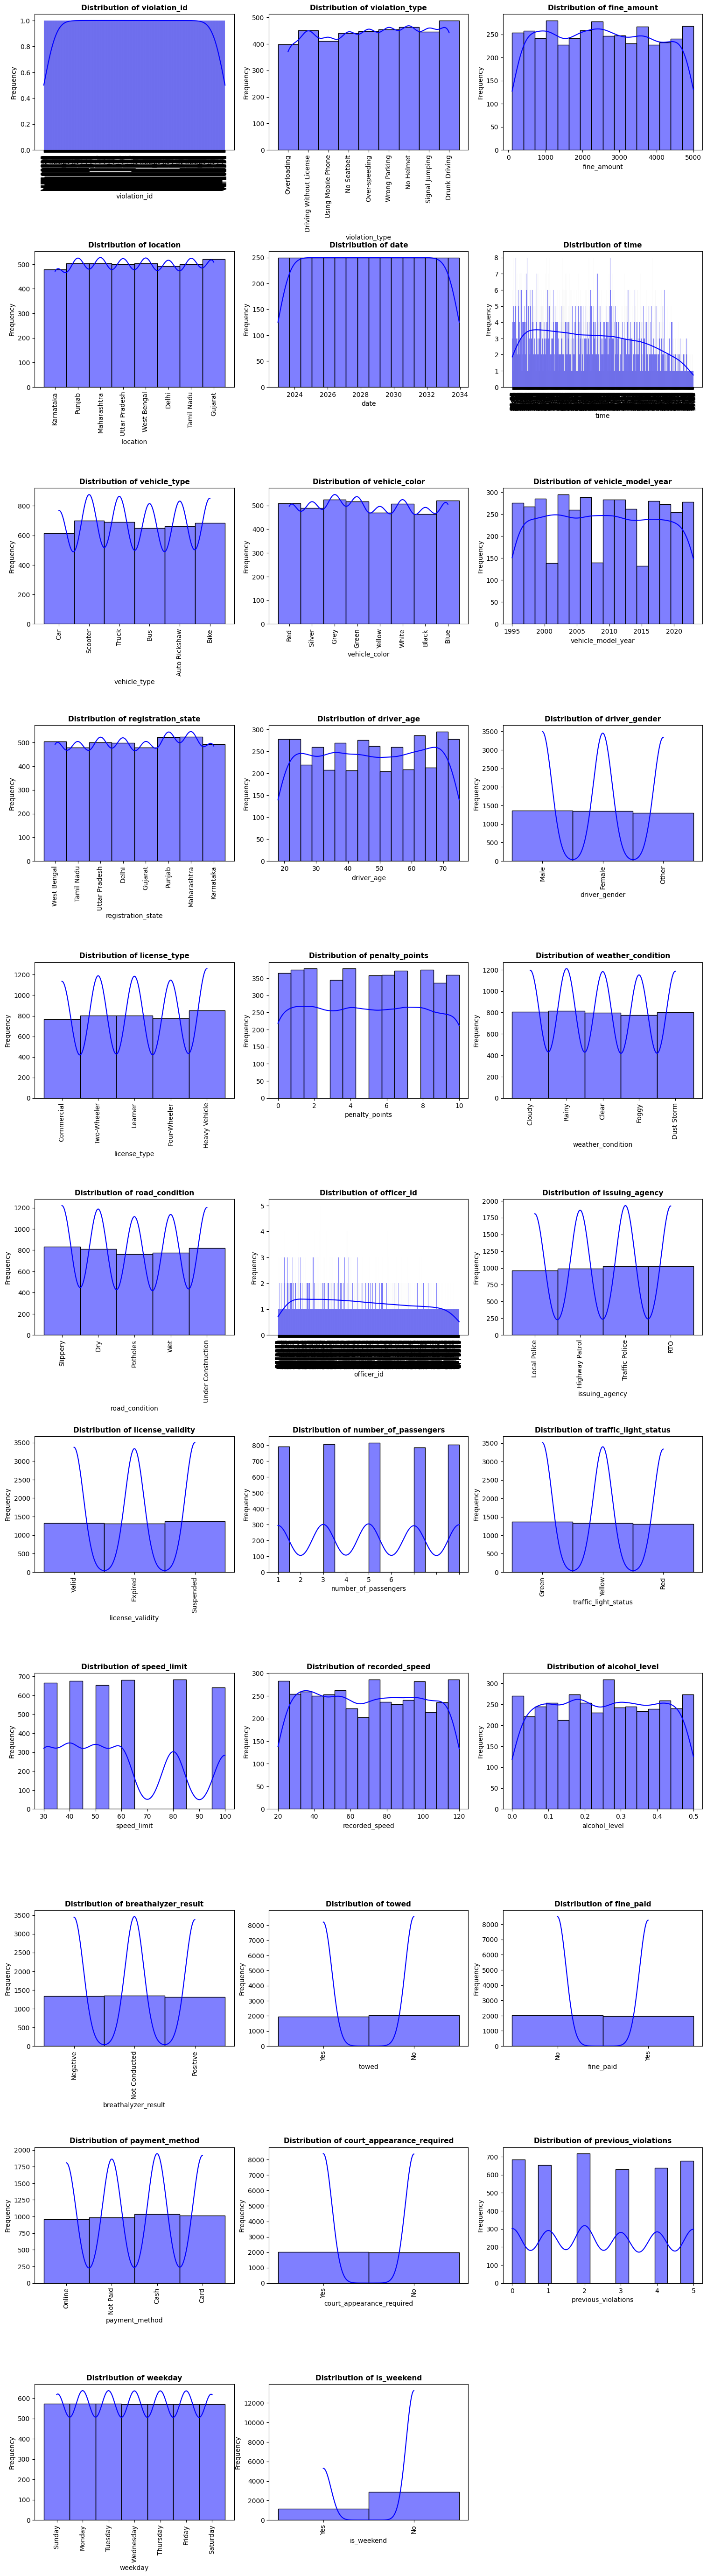

In [ ]:
num_vars = len(df.columns)
cols = 3
rows = (num_vars//cols) + (num_vars % cols > 0)

fig, axes = plt.subplots( rows,cols, figsize=(15, 5 * rows))
axes = axes.flatten()
for i, col in enumerate(df.columns):
  sns.histplot(
      df[col],
      ax = axes[i],
      kde = True,
      color = 'blue')
  axes[i].set_title(f'Distribution of {col}', fontweight = 'bold', size = 11)
  if df[col].dtype == 'object':
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
  else:
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)

  axes[i].set_ylabel('Frequency')

for j in range (i + 1, len(axes)):
  fig.delaxes(axes[j])


plt.tight_layout(pad = 0.1)
plt.show()

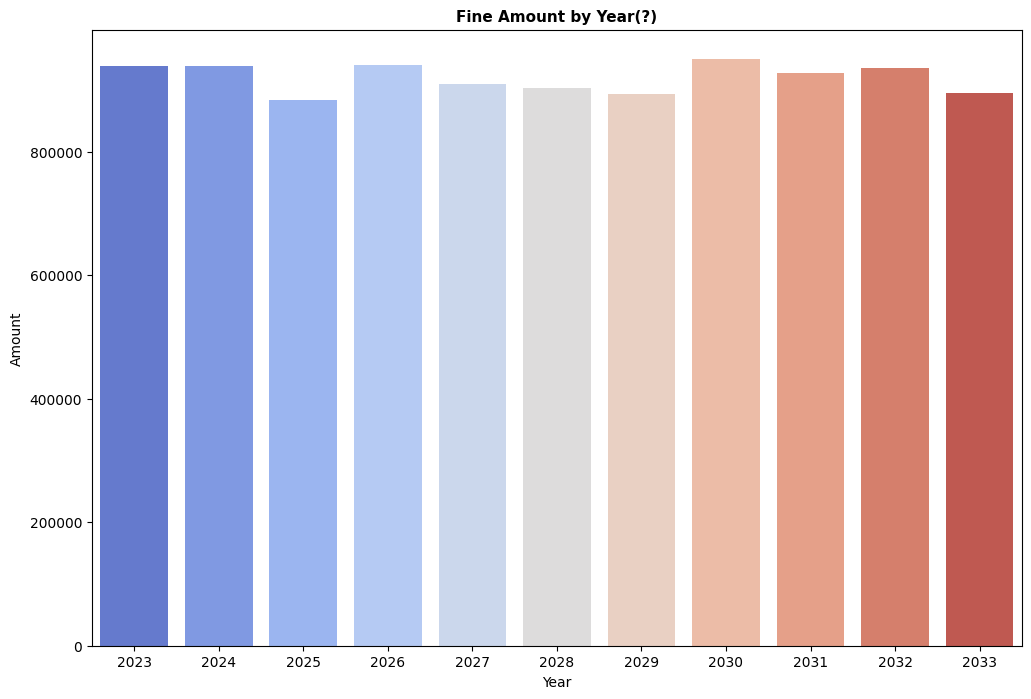

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(
    data = df,
    x = 'year',
    y = 'fine_amount',
    estimator = np.sum,
    errorbar = None,
    palette = 'coolwarm'
)

plt.title('Fine Amount by Year(?)', size =11, fontweight = 'bold')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

In [ ]:
df_year = df.groupby('year')['violation_id'].count().reset_index().sort_values(by='violation_id', ascending = False)
df_year

,year,violation_id
1,2024,366
9,2032,366
5,2028,366
2,2025,365
0,2023,365
4,2027,365
3,2026,365
6,2029,365
7,2030,365
8,2031,365


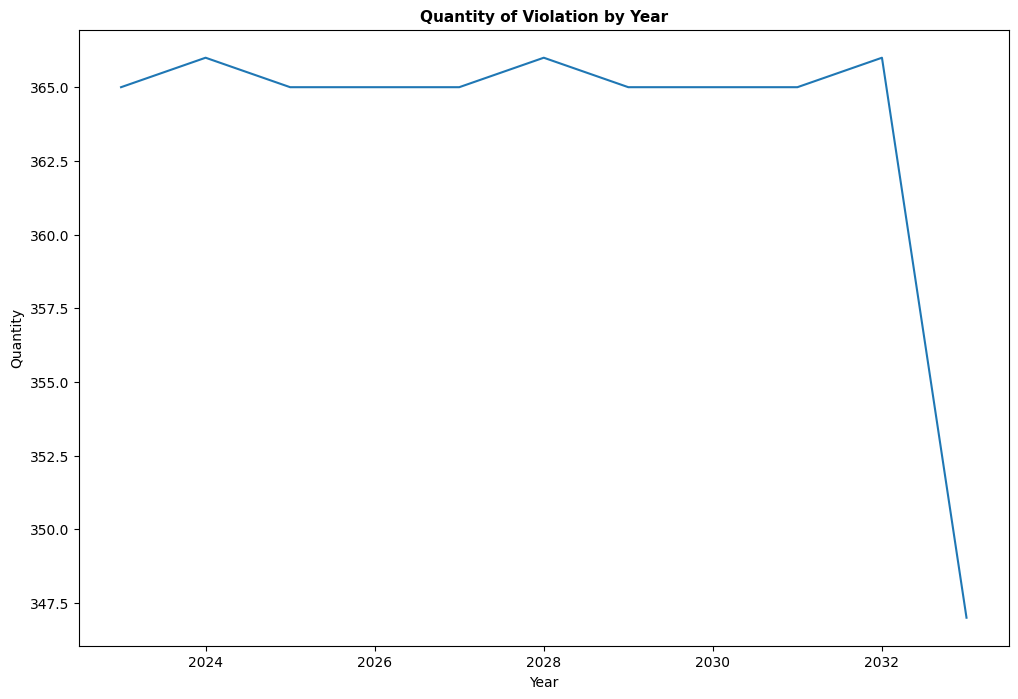

In [ ]:
df_year = df.groupby('year')['violation_id'].count().reset_index().sort_values(by='violation_id', ascending = False)
df_year['violation_id'].astype(int)

plt.figure(figsize=(12,8))
sns.lineplot(
    data = df_year,
    x = 'year',
    y = 'violation_id',
    palette = 'coolwarm'
)
plt.title('Quantity of Violation by Year', size =11, fontweight = 'bold')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.show()

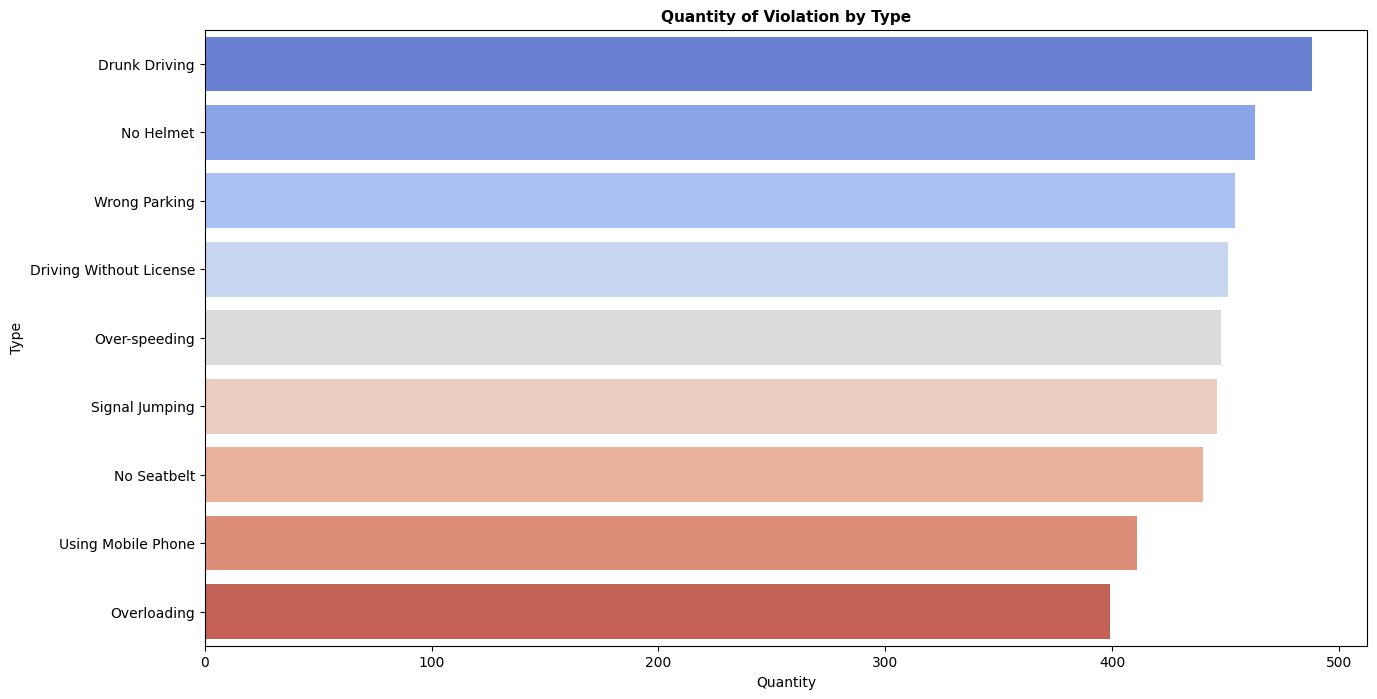

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(
    data = df,
    y = 'violation_type',
    palette = 'coolwarm',
    order = df['violation_type'].value_counts().index
)
plt.title('Quantity of Violation by Type', fontweight = 'bold', size = 11)
plt.xlabel('Quantity')
plt.ylabel('Type')
plt.show()

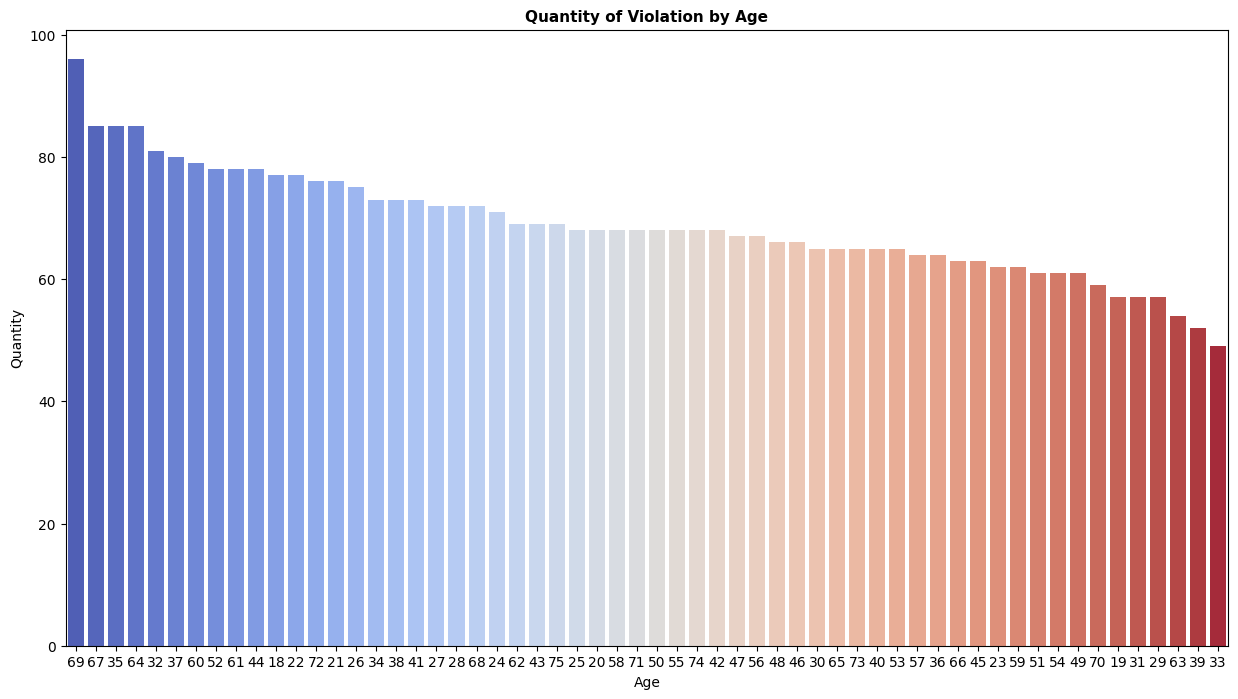

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(
    data = df,
    x = 'driver_age',
    palette = 'coolwarm',
    order = df['driver_age'].value_counts().index
)
plt.title('Quantity of Violation by Age', fontweight = 'bold', size = 11)
plt.xlabel('Age')
plt.ylabel('Quantity')
plt.show()

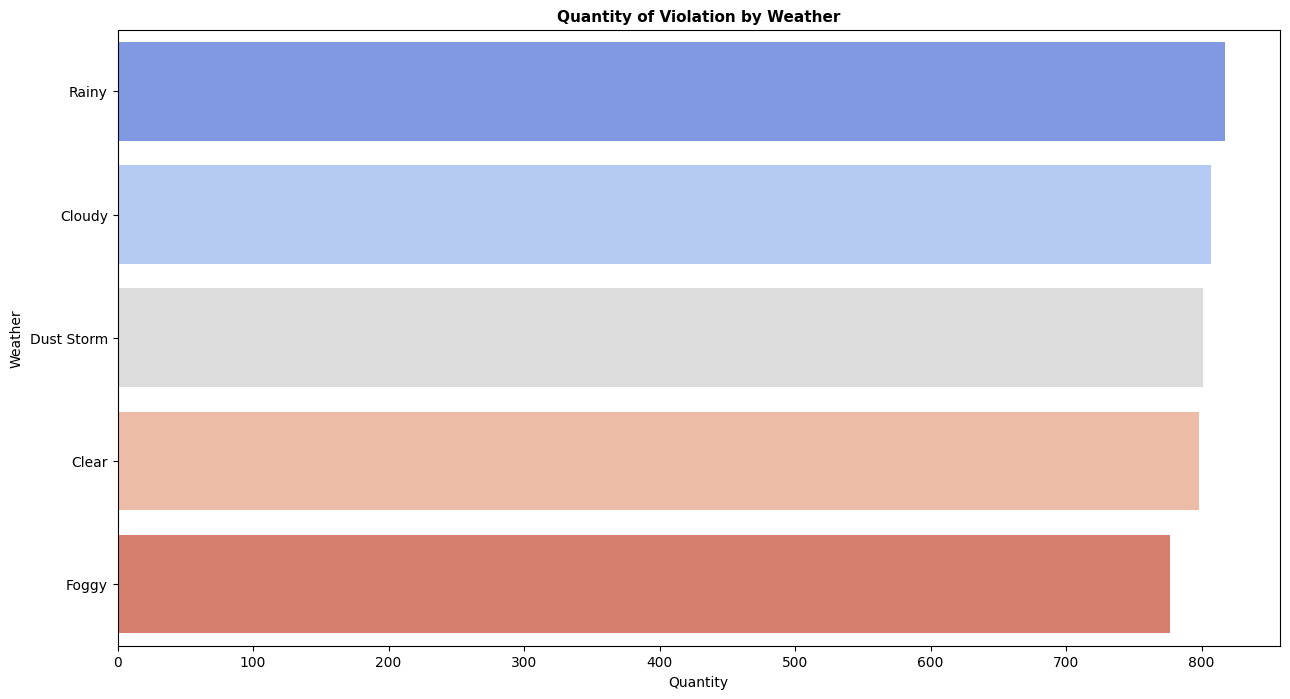

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(
    data = df,
    y = 'weather_condition',
    palette = 'coolwarm',
    order = df['weather_condition'].value_counts().index
)
plt.title('Quantity of Violation by Weather', fontweight = 'bold', size = 11)
plt.xlabel('Quantity')
plt.ylabel('Weather')
plt.show()

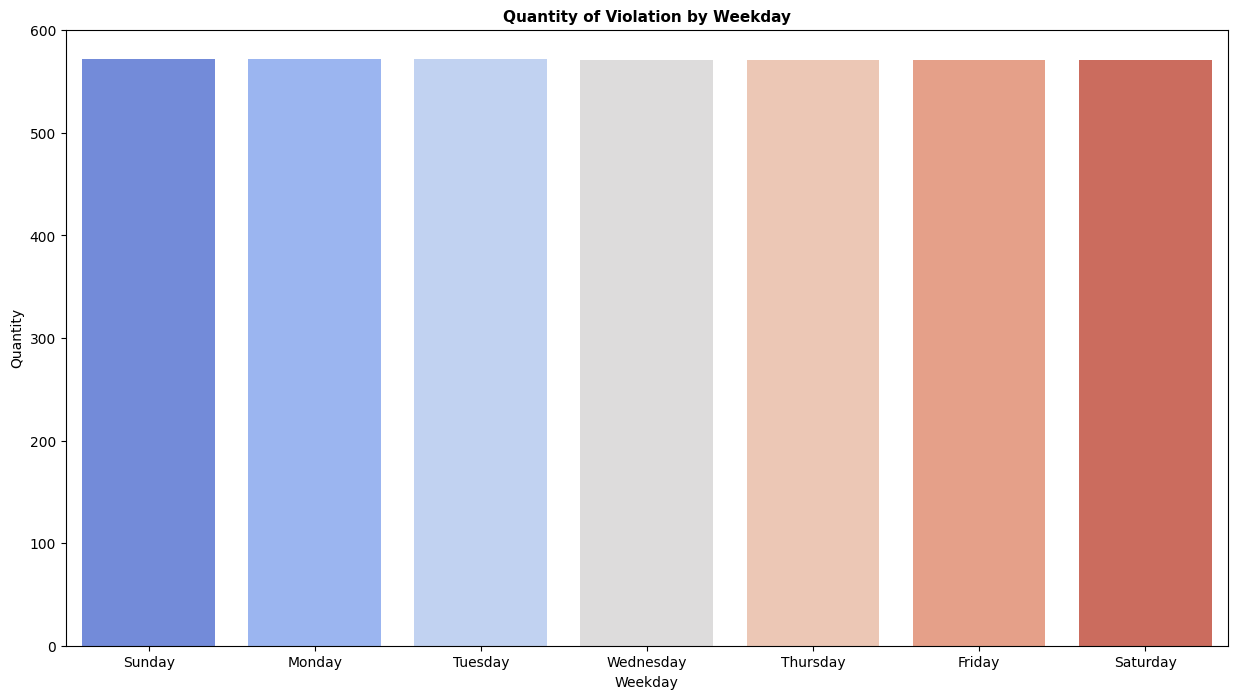

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(
    data = df,
    x = 'weekday',
    palette = 'coolwarm',
    order = df['weekday'].value_counts().index
)
plt.title('Quantity of Violation by Weekday', fontweight = 'bold', size = 11)
plt.xlabel('Weekday')
plt.ylabel('Quantity')
plt.show()

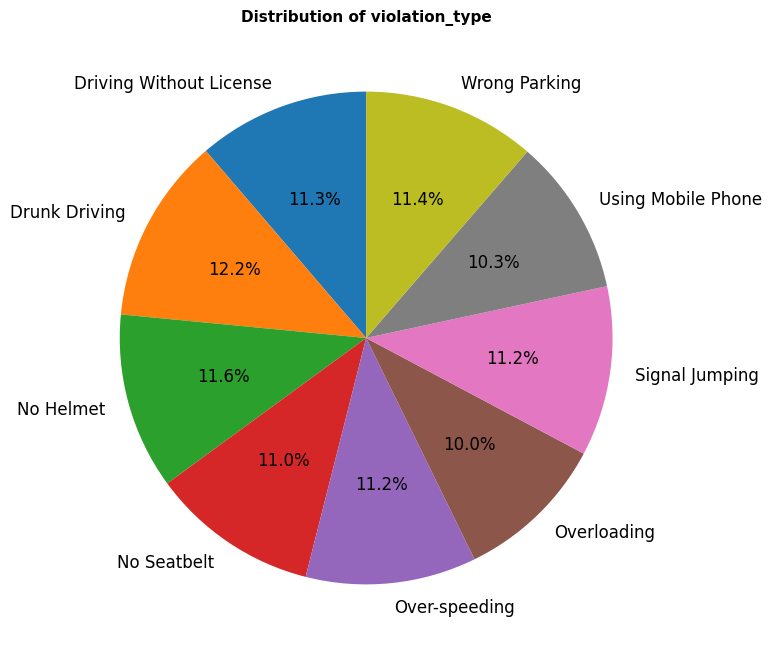

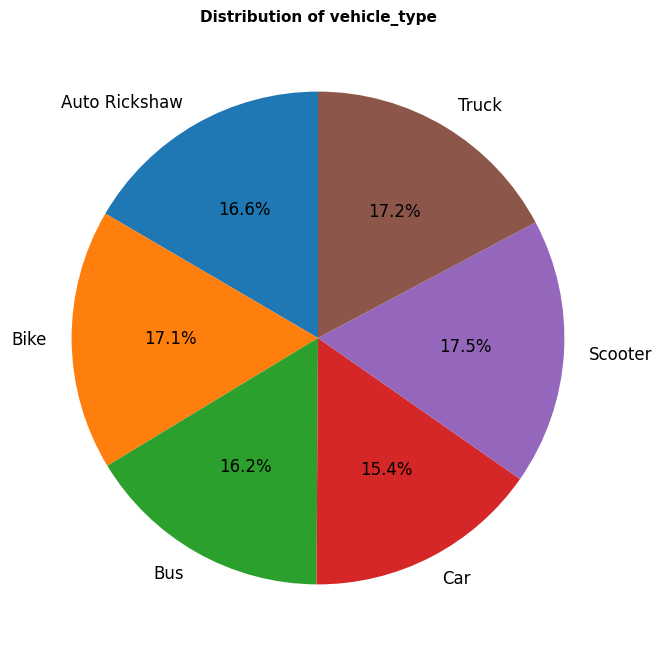

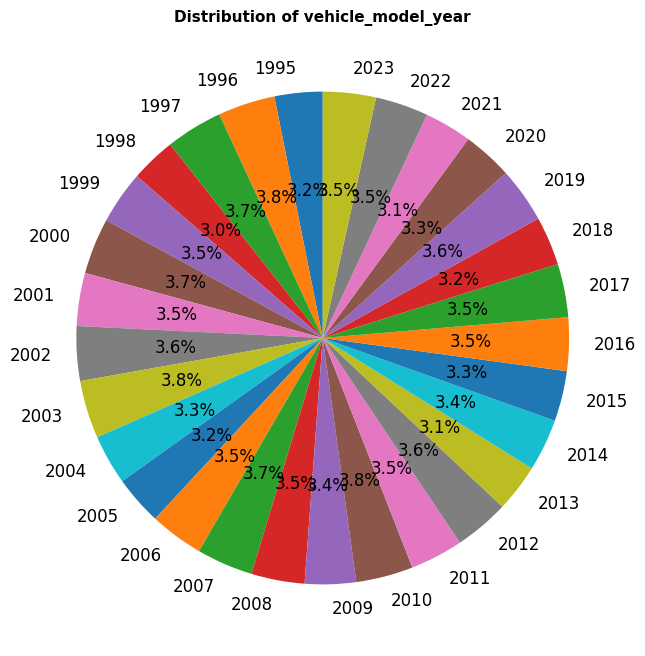

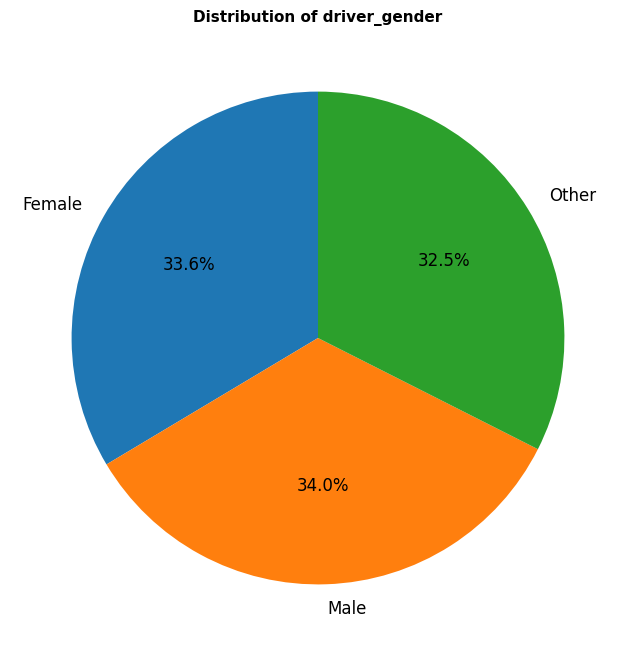

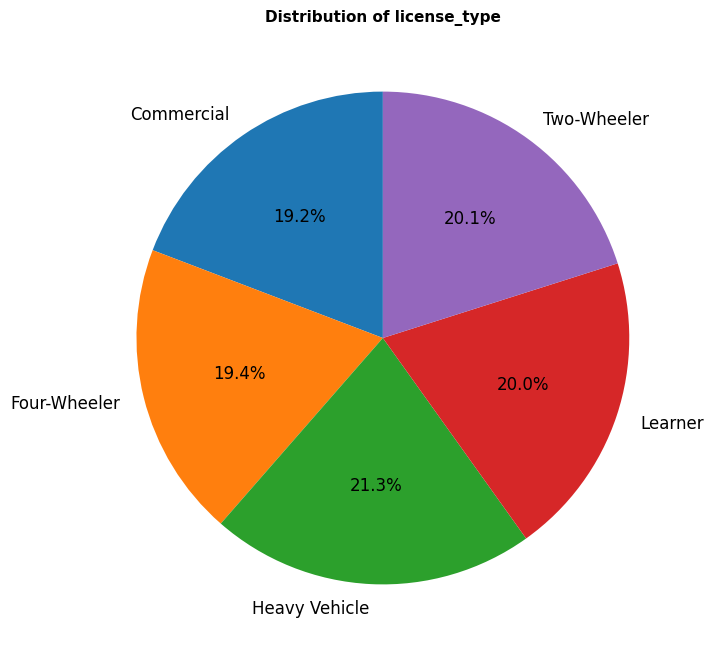

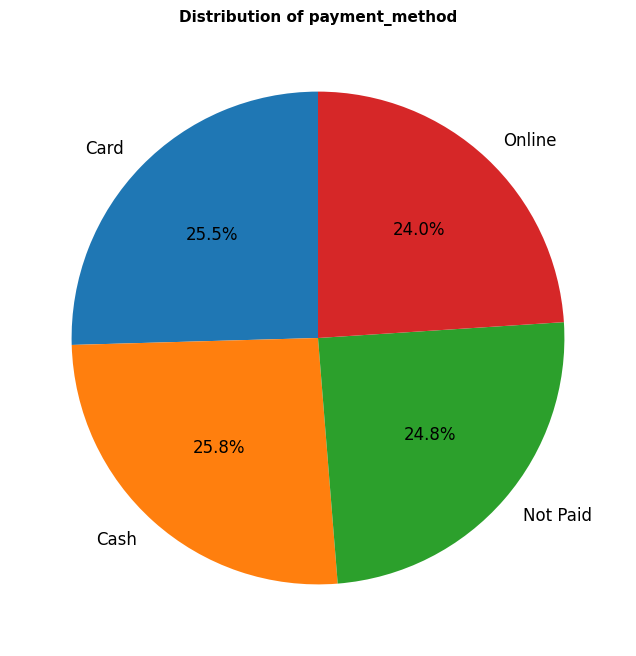

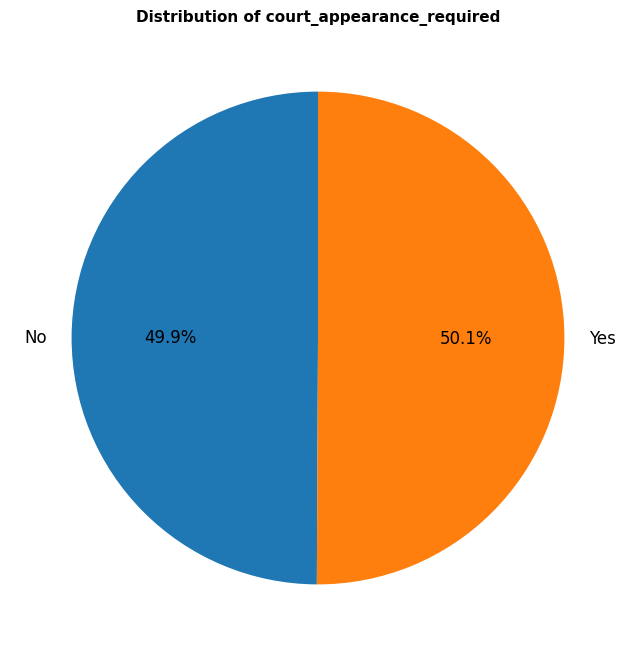

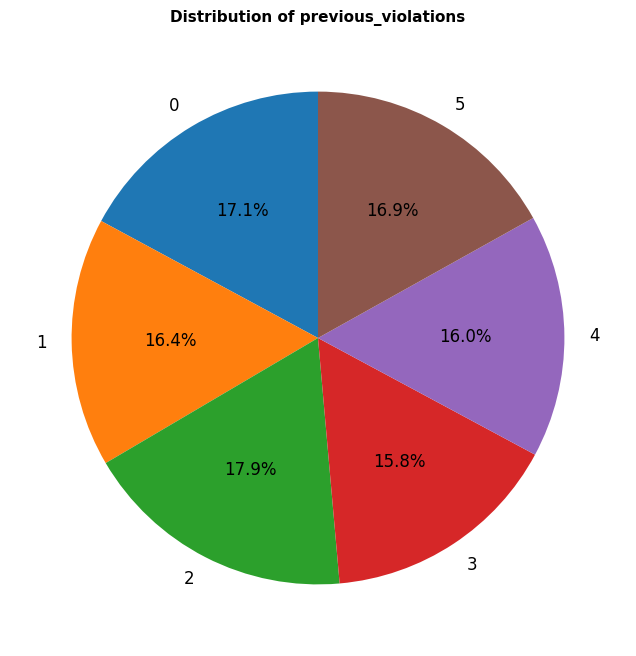

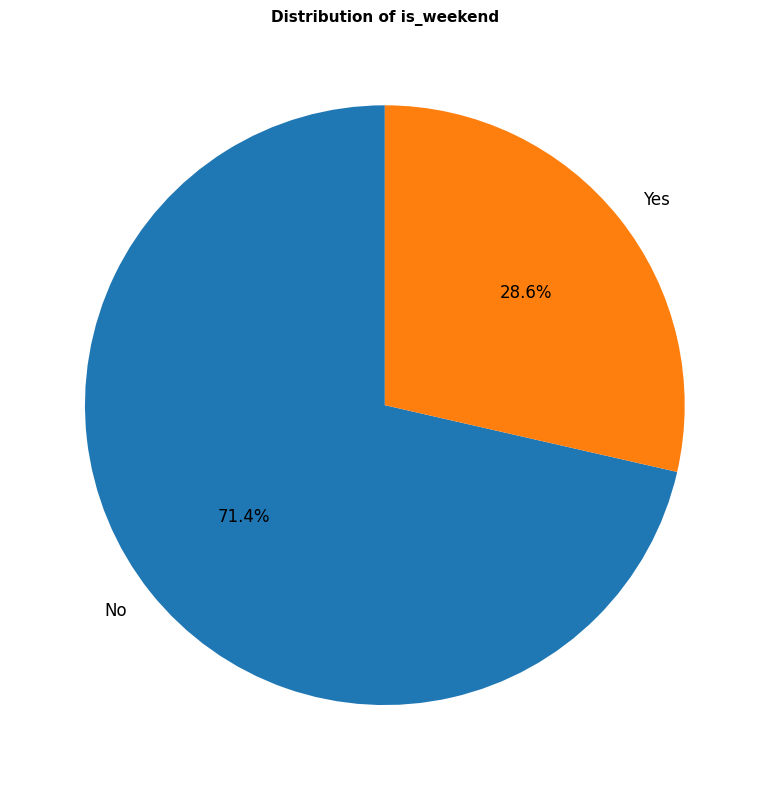

In [ ]:
data1 = ['violation_type', 'vehicle_type', 'vehicle_model_year', 'driver_gender','license_type', 'payment_method', 'court_appearance_required','previous_violations', 'is_weekend']

for i, col in enumerate(data1):
  df_grouped = df.groupby(col)['violation_id'].count().reset_index()
  plt.figure(figsize=(12,8))
  plt.pie(
      x = df_grouped['violation_id'],
      labels = df_grouped[col],
      autopct = '%1.1f%%',
      startangle = 90,
      textprops = {'fontsize':'12'}
  )
  plt.title(f'Distribution of {col}', size = 11, fontweight  = 'bold')

plt.tight_layout()
plt.show()


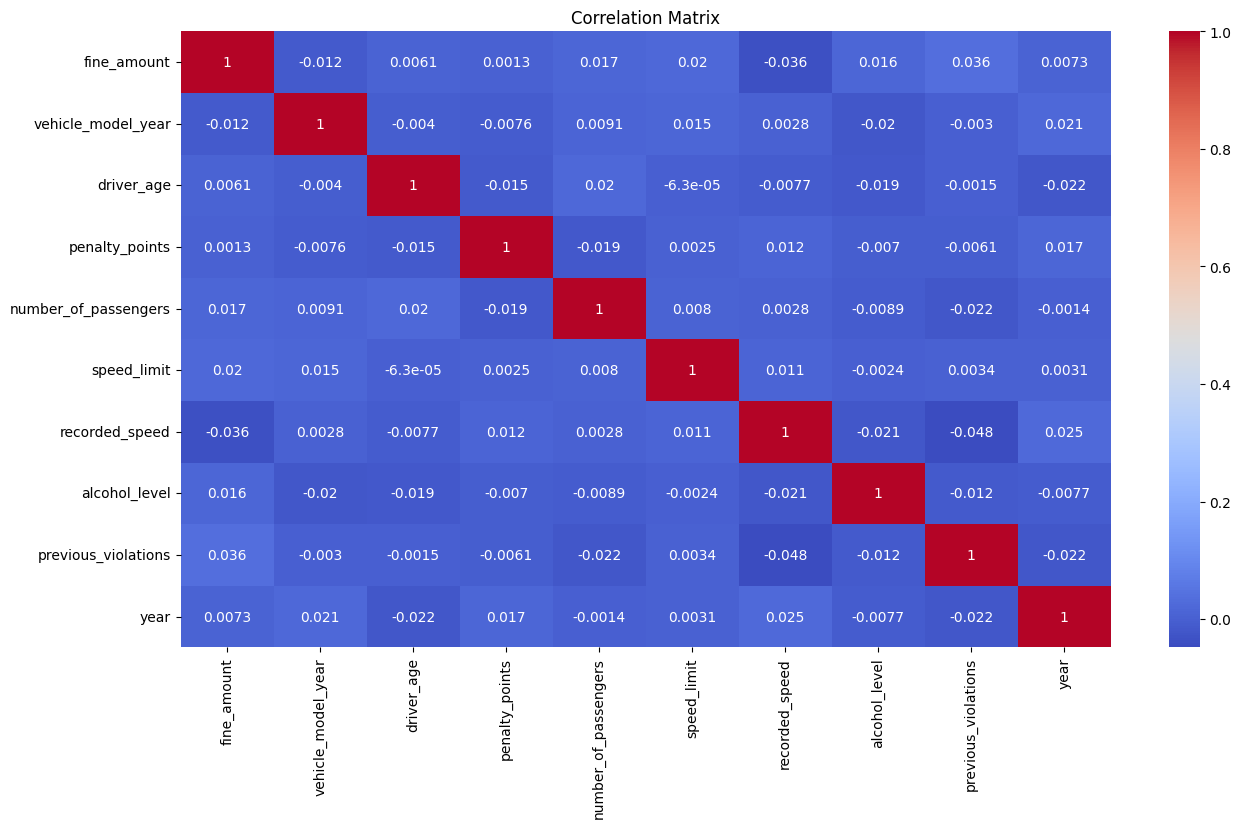

In [ ]:
num_columns = df.select_dtypes(include = [np.number])
plt.figure(figsize =(15,8))
sns.heatmap(
    num_columns.corr(),
    annot = True,
    cmap = 'coolwarm'
)
plt.title('Correlation Matrix')
plt.show()